## CA 1, LLMs Spring 2024

- ***Name: Pouya Sadeghi***
- ***Student ID: 810199447***

---
### This is due on **April 2nd, 2024**, submitted via [elearn](https://elearn.ut.ac.ir/).
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

### **IMPORTANT**: After copying this notebook to your Google Drive, please paste a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
# ***LINK: *https://drive.google.com/file/d/1zTzz21Z-EJKa2OpB7cK-4sJJD35zGe9s/view?usp=sharing****

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
namazifard@ut.ac.ir

---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [ ]:
!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

--2024-04-02 20:06:45--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-02 20:06:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.07MB/s    in 2m 39s  

2024-04-02 20:09:26 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [ ]:
## WRITE YOUR CODE HERE!
def print_similarities_to_set(word: str, word_set: list[str], model: KeyedVectors):
    """print the similarities of each word in word_set to a given word, considering W2V provided"""
    print(f"Similar words to {word}:")
    for w in word_set:
        print(f"\t({word}) <-> {w:<15} : {model.similarity(word, w):.6f}")

### First, we suggest similar works be human effort
semantically_similar_words_human = {
    "computer": ["hardware", "software", "technology", "internet", "device"], # we assume some terminologies are similar to computer
    "football": ["soccer", "basketball", "volleyball", "chess"], # we assume sports should be similar
    "ocean": ["water", "sea", "beach", "waves", "boat"], # we assume some words related to and seen around ocean
    "music": ["song", "singer", "rhythm", "guitar", "harmony"], # we assume some words related to music and creating it
    "artificial": ["intelligence", "synthetic", "leg", "material", "element"]
}
print(f"{'[ Human guest ]':*^50}")
for word, word_set in semantically_similar_words_human.items():
    print_similarities_to_set(word, word_set, model)

### Then, we would find real top 5 similar words to given words
semantically_similar_words = {
    "computer": model.most_similar("computer", topn=5),
    "football": model.most_similar("football", topn=5),
    "ocean": model.most_similar("ocean", topn=5),
    "music": model.most_similar("music", topn=5),
    "artificial": model.most_similar("artificial", topn=5)
}
print(f"{'[ Real top 5 ]':*^50}")
for word, word_set in semantically_similar_words.items():
    print_similarities_to_set(word, [w[0] for w in word_set], model)

*****************[ Human guest ]******************
Similar words to computer:
	(computer) <-> hardware        : 0.636863
	(computer) <-> software        : 0.782846
	(computer) <-> technology      : 0.690766
	(computer) <-> internet        : 0.644621
	(computer) <-> device          : 0.564322
Similar words to football:
	(football) <-> soccer          : 0.810518
	(football) <-> basketball      : 0.789614
	(football) <-> volleyball      : 0.572471
	(football) <-> chess           : 0.385325
Similar words to ocean:
	(ocean) <-> water           : 0.527622
	(ocean) <-> sea             : 0.727745
	(ocean) <-> beach           : 0.483294
	(ocean) <-> waves           : 0.575693
	(ocean) <-> boat            : 0.524134
Similar words to music:
	(music) <-> song            : 0.649591
	(music) <-> singer          : 0.573627
	(music) <-> rhythm          : 0.462322
	(music) <-> guitar          : 0.573103
	(music) <-> harmony         : 0.338656
Similar words to artificial:
	(artificial) <-> intelligence 

**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [ ]:
## WRITE YOUR CODE HERE!
def print_analogy(word1: str, word2: str, word3: str, model: KeyedVectors, topn=3):
    """print the analogy of word1 - word2 + word3, considering W2V provided"""
    print(f"Analogy: {word1} - {word2} + {word3}:")
    for idx, w in enumerate(model.most_similar(positive=[word1, word3], negative=[word2], topn=topn), start=1):
        print(f"({idx})\t{w[0]} ({w[1]:.6f})")

print_analogy("king", "man", "woman", model) # mentioned to be 'queen'? [yes]

### try 5 costume samples, considering the formula 'word1 - word2 + word3' mentioned. We understand other formulas are possible.
analogies_triples = [
    ("king", "queen", "woman"), # would we get man? [yes]
    ("paris", "france", "italy"), # can we get capitals, given contries? [yes]
    ("dog", "puppy", "cat"), # would we get kitten? [No]
    ("car", "road", "ship"), # does in understand means and modes(infrastructure) of transportation? [No]
    ("apple", "fruit", "carrot") # does it capture group-member relation? [No]
]
print(f"{'[ 5 New Samples ]':*^50}")
for at in analogies_triples:
    print_analogy(*at, model)

Analogy: king - man + woman:
(1)	queen (0.697868)
(2)	princess (0.608175)
(3)	monarch (0.588975)
****************[ 5 New Samples ]*****************
Analogy: king - queen + woman:
(1)	man (0.717850)
(2)	person (0.605025)
(3)	father (0.599216)
Analogy: paris - france + italy:
(1)	rome (0.758541)
(2)	milan (0.685050)
(3)	italian (0.664783)
Analogy: dog - puppy + cat:
(1)	dogs (0.627271)
(2)	cats (0.592487)
(3)	horse (0.556448)
Analogy: car - road + ship:
(1)	vessel (0.646534)
(2)	ships (0.602428)
(3)	boat (0.591753)
Analogy: apple - fruit + carrot:
(1)	intel (0.479812)
(2)	microsoft (0.465675)
(3)	netscape (0.444649)


### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

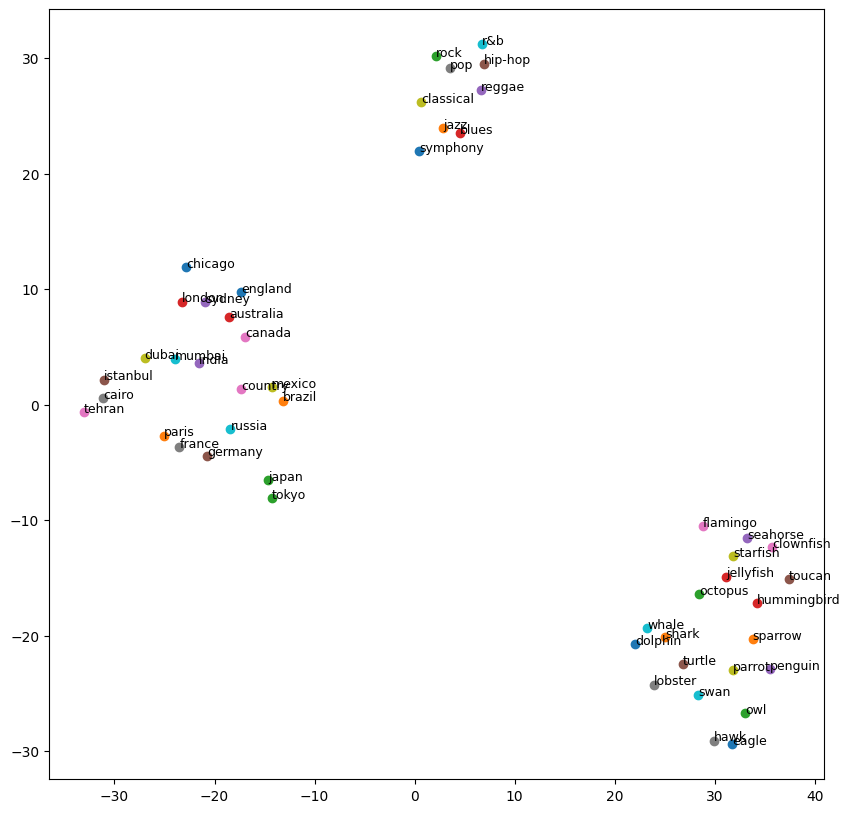

In [ ]:
words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]


## WRITE YOUR CODE HERE!
## Use 5 for perplexity of TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_tsne(words: list[str], model: KeyedVectors, perplexity=5):
    """plot the TSNE of given words, considering W2V provided"""
    embeddings = np.array([model[word] for word in words])
    tsne = TSNE(n_components=2, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        x, y = embeddings_2d[i]
        plt.scatter(x, y)
        plt.text(x, y, word, fontsize=9)
    plt.show()

plot_tsne(words, model)

Analyze the plot and clusters of embeddings in a few sentences.

***WRITE YOUR ANSWER HERE***

The plot shows that the embeddings of similar words are close to each other.
For example, the words related to sea creatures are clustered together, and the words related to countries (Music genra) are also clustered.
This could visually prove that the provided embedding is able to capture semantic meaning.
However, this kind of embedding are static and can't kapture contextual information. This is one of their advantages. Also, the training corpus somehow affects this embeddings. this could explain why Music genra are not clustered properly, or why japan and tokyo are so close, while being away from others. They tried to reduce this bias by using larger corpus, but that would be a natual bias which won't be totally eliminated (at least in this way).

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [ ]:
## WRITE YOUR CODE HERE!
TOPN = 5
def find_most_similar_words(word: str, model: KeyedVectors, topn=5) -> list[tuple[str, float]]:
    """find the most similar words to a given word, considering W2V provided"""
    most_similars = [(w[0], w[1]) for w in model.most_similar(word, topn=topn)]
    print(f"Most similar words to {word}:")
    for idx, w in enumerate(most_similars, start=1):
        print(f"({idx})\t{w[0]} ({w[1]:.6f})")
    print()
    return most_similars

most_similar_bat = find_most_similar_words("bat", model, TOPN)
most_similar_charge = find_most_similar_words("charge", model, TOPN)

Most similar words to bat:
(1)	bats (0.691724)
(2)	batting (0.616059)
(3)	balls (0.569273)
(4)	batted (0.553091)
(5)	toss (0.550613)

Most similar words to charge:
(1)	charges (0.817718)
(2)	charged (0.806714)
(3)	charging (0.660698)
(4)	guilty (0.637536)
(5)	accused (0.623976)



Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [23]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [24]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 13
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([1, 6, 768])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

Word embeddings for 'bat' in each layer of BERT:
(size) Layer 1 : torch.Size([1, 768])
(size) Layer 2 : torch.Size([1, 768])
(size) Layer 3 : torch.Size([1, 768])
(size) Layer 4 : torch.Size([1, 768])
(size) Layer 5 : torch.Size([1, 768])
(size) Layer 6 : torch.Size([1, 768])
(size) Layer 7 : torch.Size([1, 768])
(size) Layer 8 : torch.Size([1, 768])
(size) Layer 9 : torch.Size([1, 768])
(size) Layer 10: torch.Size([1, 768])
(size) Layer 11: torch.Size([1, 768])
(size) Layer 12: torch.Size([1, 768])
(size) Layer 13: torch.Size([1, 768])

Cosine similarity between 'bat' embeddings in each layer of BERT:
(cosine) Layer 1: 0.957523
(cosine) Layer 2: 0.833730
(cosine) Layer 3: 0.790840
(cosine) Layer 4: 0.752565
(cosine) Layer 5: 0.681204
(cosine) Layer 6: 0.668320
(cosine) Layer 7: 0.669358
(cosine) Layer 8: 0.656166
(cosine) Layer 9: 0.639816
(cosine) Layer 10: 0.619490
(cosine) Layer 11: 0.618103
(cosine) Layer 12: 0.632128
(cosine) Layer 13: 0.568512


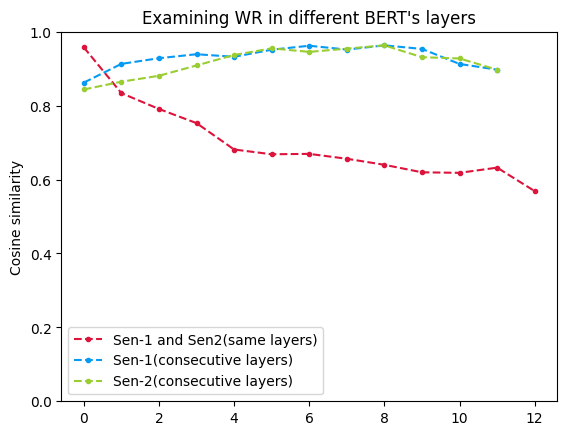

In [26]:
## WRITE YOUR CODE HERE!
import torch
import numpy as np
import matplotlib.pyplot as plt

@torch.no_grad()
def get_transformer_word_embedding(word: str, sentence: str, model: BertModel, tokenizer: BertTokenizer) -> torch.Tensor:
    """Get the embedding of a word in a sentence, considering BERT provided"""
    encodings = tokenizer(sentence, return_tensors='pt')
    outputs = model(**encodings)
    token_ids = encodings['input_ids'][0]
    w_id = tokenizer.convert_tokens_to_ids(word)
    word_positions = [i for i, token_id in enumerate(token_ids) if token_id == w_id]
    hidden_states = outputs.hidden_states

    embeddings = []
    for layer_output in hidden_states:
        layer_embeddings = torch.stack([layer_output[0, idx, :] for idx in word_positions])
        embeddings.append(layer_embeddings)
    embeddings = torch.stack(embeddings, dim=0)

    return embeddings

def calculate_cosine_similarity(v1: torch.Tensor, v2: torch.Tensor) -> float:
    """calculate the cosine similarity between two vectors"""
    return torch.nn.functional.cosine_similarity(v1, v2).mean().item()

def analyze_word_embeddings(word: str, sentences: list[str], model: BertModel, tokenizer: BertTokenizer):
    """analyze the embeddings of a word in the output of each layer of the BERT model for the provided sentences"""
    word_embeddings = {sentence: get_transformer_word_embedding(word, sentence, model, tokenizer) for sentence in sentences}
    print(f"Word embeddings for '{word}' in each layer of BERT:")
    for idx, word_embedding in enumerate(word_embeddings[sentences[0]], start=1):
        print(f"(size) Layer {idx:<2}: {word_embedding.size()}")
    print()
    print(f"Cosine similarity between '{word}' embeddings in each layer of BERT:")
    similarities = {
        "s1": [],
        "s2": [],
        "s1-s2": [],
    }
    itr = zip(word_embeddings[sentences[0]], word_embeddings[sentences[1]])
    for layer_idx, (we1, we2) in enumerate(itr):
        similarity = calculate_cosine_similarity(we1, we2)
        print(f"(cosine) Layer {layer_idx + 1}: {similarity:.6f}")
        similarities["s1-s2"].append(similarity)
    itr = zip(word_embeddings[sentences[0]][:-1], word_embeddings[sentences[0]][1:])
    for layer_idx, (we1, we2) in enumerate(itr):
        similarity = calculate_cosine_similarity(we1, we2)
        similarities["s1"].append(similarity)
    itr = zip(word_embeddings[sentences[1]][:-1], word_embeddings[sentences[1]][1:])
    for layer_idx, (we1, we2) in enumerate(itr):
        similarity = calculate_cosine_similarity(we1, we2)
        similarities["s2"].append(similarity)

    # Plot similarity
    fig, ax = plt.subplots()
    colors = ['#DC143C', '#069AF3', '#9ACD32']
    vec = similarities["s1-s2"]
    ax.plot(range(len(vec)), vec, marker=".", color=colors[0], linestyle='--', label="Sen-1 and Sen2(same layers)")
    vec = similarities["s1"]
    ax.plot(range(len(vec)), vec, marker=".", color=colors[1], linestyle='--', label="Sen-1(consecutive layers)")
    vec = similarities["s2"]
    ax.plot(range(len(vec)), vec, marker=".", color=colors[2], linestyle='--', label="Sen-2(consecutive layers)")
    ax.set_ylim(0, 1)
    ax.set_ylabel("Cosine similarity")
    ax.set_title("Examining WR in different BERT's layers")
    ax.legend()
    plt.show()

sentences = [
    "The bat flew swiftly through the air.",
    "He grabbed his bat and headed to the baseball field."
]
analyze_word_embeddings("bat", sentences, model, tokenizer)

Do the same for **charge** provided sentences.

Word embeddings for 'charge' in each layer of BERT:
(size) Layer 1 : torch.Size([1, 768])
(size) Layer 2 : torch.Size([1, 768])
(size) Layer 3 : torch.Size([1, 768])
(size) Layer 4 : torch.Size([1, 768])
(size) Layer 5 : torch.Size([1, 768])
(size) Layer 6 : torch.Size([1, 768])
(size) Layer 7 : torch.Size([1, 768])
(size) Layer 8 : torch.Size([1, 768])
(size) Layer 9 : torch.Size([1, 768])
(size) Layer 10: torch.Size([1, 768])
(size) Layer 11: torch.Size([1, 768])
(size) Layer 12: torch.Size([1, 768])
(size) Layer 13: torch.Size([1, 768])

Cosine similarity between 'charge' embeddings in each layer of BERT:
(cosine) Layer 1: 0.973695
(cosine) Layer 2: 0.749343
(cosine) Layer 3: 0.669290
(cosine) Layer 4: 0.577310
(cosine) Layer 5: 0.484223
(cosine) Layer 6: 0.457412
(cosine) Layer 7: 0.391742
(cosine) Layer 8: 0.399647
(cosine) Layer 9: 0.338181
(cosine) Layer 10: 0.338186
(cosine) Layer 11: 0.366591
(cosine) Layer 12: 0.426040
(cosine) Layer 13: 0.370317


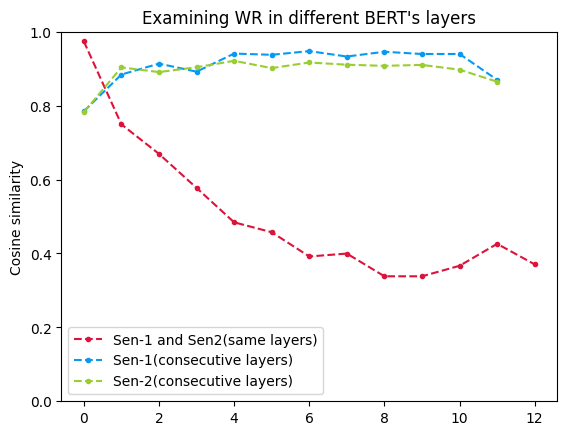

In [27]:
## WRITE YOUR CODE HERE!
sentences = [
    "I need to charge my phone before leaving.",
    "He was arrested for charge of theft."
]

analyze_word_embeddings("charge", sentences, model, tokenizer)

Write a few sentences about your results and how `BERT` captures the contextual meaning of words.



***WRITE YOUR ANSWER HERE***

This kind os analysis, referred to as 'probing', shows that BERT captures the contextual meaning of words.
As we can see from plots above, the cosine similarity between the embeddings of the word 'bat' (or 'charge') in the two sentences is higher in the earlier layers of BERT, and it decreases as we move to the later layers. This indicates that the word 'bat'('charge') has different meanings in the two sentences, and BERT captures this difference by providing different embeddings for the word in the two sentences.
In this analysis, we can understand that in earlier layers, BERT just consider the word itself (regardless of its contextx), and in later layers, it considers the context of the word in the sentence. This is why the similarity between the embeddings of the word in the two sentences decreases as we move to the later layers, as the embeddings of the word individually, would be the same in different contexts (just ignore about segment and position embedding) which leads to almost the same embeddings in the earlier layers (we used the term *almost* and seg&pos embedding could lead to a small difference).

Also, we have shown two other plots, which show the similarity of the embeddings of the word 'bat' or 'charge' in the same sentence in consecutive layers.
 The similarity between the embeddings of the word in consecutive layers is high, but in the first layers isn't much high, which indicates that much of the contextual information is captured and embedded into word's embedding (you can validate this reduction rate of the red plots). Also for harder task such as sarcastic usage of the word, it may showed it higher layers, proving that BERT needs more information and interactions to understand their meaning.

### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [9]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [10]:
## WRITE YOUR CODE HERE!
import torch
import numpy as np
import textwrap

@torch.no_grad()
def mask_and_predict(sentence: str, str_to_mask: str, model: AutoModelForMaskedLM, tokenizer: AutoTokenizer, topk=5):
    """mask a word in a sentence and predict the topk choices, considering BERT provided"""
    mask_token = tokenizer.mask_token
    mask_token_id = tokenizer.mask_token_id
    inputs = tokenizer(sentence, return_tensors="pt")
    input_ids = inputs["input_ids"]

    str_to_mask_tokens = tokenizer.tokenize(str_to_mask)
    num_tokens_to_mask = len(str_to_mask_tokens)
    mask_idx = torch.where(input_ids == tokenizer.convert_tokens_to_ids(str_to_mask_tokens[0]))[1]
    input_ids[0, mask_idx:mask_idx + num_tokens_to_mask] = mask_token_id
    masked_input = tokenizer.decode(input_ids[0])

    outputs = model(input_ids)
    logits = outputs.logits

    topk_tokens_set = []
    for i in range(num_tokens_to_mask):
      mask_logits = logits[0, mask_idx[0]+i]
      topk_tokens = torch.topk(mask_logits, topk).indices
      topk_tokens = [tokenizer.decode([token_id]) for token_id in topk_tokens]
      topk_tokens_set.append(topk_tokens)
    return topk_tokens_set, masked_input

sentences_and_mask = [
    ("William Shakespeare, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.", "William Shakespeare"),
    ("The Amazon Rainforest, spanning across nine countries in South America, is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.", "South America"),
    ("The Statue of Liberty, a gift from France to the United States, was dedicated on October 28, 1886. Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity.", "France")
]
for sentence, str_to_mask in sentences_and_mask:
    topk_tokens_set, masked_input = mask_and_predict(sentence, str_to_mask, model, tokenizer)
    paired_list = list(zip(*topk_tokens_set))
    paired_list_numbered = '\n'.join([f"({i}): {'| '.join([f'{i:<10}'for i in lst])}" for i , lst in enumerate(paired_list, start=1)])
    print(f"""\
>>>> Input String:
{textwrap.fill(masked_input, 90)}

---- Masked string:
{str_to_mask}

++++ Predicted tokens:
{paired_list_numbered}
""")


>>>> Input String:
[CLS] [MASK] [MASK], widely regarded as the greatest writer in the english language, was
born in stratford - upon - avon, england, in 1564. [SEP]

---- Masked string:
William Shakespeare

++++ Predicted tokens:
(1): thomas    | shakespeare
(2): william   | scott     
(3): edmund    | johnson   
(4): samuel    | shelley   
(5): henry     | moore     

>>>> Input String:
[CLS] the amazon rainforest, spanning across nine countries in [MASK] [MASK], is the
largest tropical rainforest on earth, covering an area of over 6. 7 million square
kilometers ( 2. 7 million square miles ) and harboring unparalleled biodiversity. [SEP]

---- Masked string:
South America

++++ Predicted tokens:
(1): the       | africa    
(2): africa    | world     
(3): asia      | asia      
(4): global    | brazil    
(5): modern    | amazon    

>>>> Input String:
[CLS] the statue of liberty, a gift from [MASK] to the united states, was dedicated on
october 28, 1886. standing on liberty island in

Write a few sentences about your results and how masked language modeling works.

***WRITE YOUR ANSWER HERE***

Except for `South America`, BERT was able to find correct answers in other cases, which shows that BERT has a good understanding of named entities.
Also in can correctly infer that to which category the mask token belongs, and provide the most probable tokens for that category. Fore example in the last sample, we need a country and top5 suggestions are all countries.

**how masked language modeling works:** This is one of known tasks in NLP, which is used to predict the masked tokens in a sentence. The model is trained on a large corpus of text, and it learns to predict the masked tokens, selected randomly, by considering the context of the sentence. It is trained to predict the masked tokens by minimizing the cross-entropy loss between the predicted tokens and the actual tokens (which is consider distribution along with the correct answer). BERT is a bidirectional model, which means in can capture context from tokens before and after the masked tokens and then predict the masked token. Thats the significance of MLM training, enabling model to take advantage of both sides' context for the token prediction; Unlike decoder-only models, which are just able to see previous context and next tokens are all masked (they train in a unidirectional way).



# Part 2: Transfer Learning with BERT (60 points)

## Adding a hardware accelerator

Please go to the menu and add a GPU as follows:

`Edit > Notebook Settings > Hardware accelerator > (GPU)`

Run the following cell to confirm that the GPU is detected.

In [11]:
import torch

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")

Found device: Tesla T4, n_gpu: 1


## Installing Hugging Face's Transformers library
We will use Hugging Face's Transformers (https://github.com/huggingface/transformers), an open-source library that provides general-purpose architectures for natural language understanding and generation with a collection of various pretrained models made by the NLP community. This library will allow us to easily use pretrained models like `BERT` and perform experiments on top of them. We can use these models to solve downstream target tasks, such as text classification, question answering, and sequence labeling.

Run the following cell to install Hugging Face's Transformers library, download data and supporting code for the homework, and install some additional packages. Note that you will be asked to link with your Google Drive account to download some of these files.

In [1]:
!pip install git+https://github.com/huggingface/accelerate
!pip install transformers
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

import os
import zipfile

data_file = drive.CreateFile({'id': '1zeo8FcaNUnhN660mGMNEAPvxOE4DPOnE'})
data_file.GetContentFile('hw1.zip')

# Extract data from the zipfile and put it into the current directory
with zipfile.ZipFile('hw1.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('hw1.zip')
# We will use hw1 as our working directory
os.chdir('hw1')
print("Data and supporting code downloaded!")

pretrained_models_dir = './pretrained_models_dir'
if not os.path.isdir(pretrained_models_dir):
  os.mkdir(pretrained_models_dir)   # directory to save pretrained models
print('model directory created')

!pip install -r requirements.txt
print('everything set up!')

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-l9e2gadx
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-l9e2gadx
  Resolved https://github.com/huggingface/accelerate to commit d927b8f3a2ee811a60dbd83d8f12193512b73fc3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.9

success!
Data and supporting code downloaded!
model directory created
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 949.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161

everything set up!


With the advent of methods such as `BERT` [(Devlin et al., 2019)](https://arxiv.org/pdf/1810.04805.pdf), the dominant paradigm for developing NLP models has shifted to transfer learning: first, pretrain a large language model on large amounts of unlabeled data, and then fine-tune the resulting model on the downstream target task. In this section, we will use `BERT` to solve downstream target tasks across several classes of problems, including classification, question answering, and sequence labeling.

### Question 2.1 (25 points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions briefly, aiming for two or three sentences each. This exercise is designed to prime your understanding of the transformative technologies we're exploring, and making sure you're well-prepared for the hands-on challenges ahead.


**A) Describe the role of the attention mechanism within BERT. How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously, and why is this beneficial for natural language understanding tasks?**

**B) Describe how BERT's bidirectionality is different from traditional sequential language models.**

**C) What is segment embedding's functionality in BERT?**

**D) Briefly describe one variant of BERT (e.g., RoBERTa, ALBERT, DistilBERT) and highlight a key difference in its approach or architecture compared to the original BERT model.**

**E) Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks?**


***WRITE YOUR ANSWER HERE IN A FEW SENTENCES FOR EACH SECTION***
***

**A)**
- The role of the attention mechanism within BERT: BERT, which is and encoder-only model with bidirectional attention, use the attention mechanism to capture dependencies and interactions between words, and help model to only focus on relevant parts of an input.
- Multi-head attention mechanism benefits for NLP tasks: This can enhance Word Representations as different head are able to learn different things, which help model to understand complex patterns and semantics that make if highly beneficial for NLP(NLU) tasks such as sentiment analysis, question answering, and text classification. It can also improve model's robustness against variations and ambiguities, as the model processing different parts of the input data concurrently. Also, it makes BERT more computationally efficient, as the model doesn't need to repeat some computations again and again and can use one time calculated results(for V,Q,K). The main advantage is extracting more information and different relation in contrast with Single HA and being computationally efficient.
- HOW MHA enable BERT to process different parts of the input data simultaneously: Each attention head operates independently and learns to attend to different aspects of the input sequence. This can help BERT to effectively capture various relationships and dependencies within the text simultaneously.
---

**B)** BERT's bidirectionality, achieved through MLM training, which randomely masks some tokens and require model to predict masked tokens based on their surrounding context. BERT and traditional sequential language models are different in many aspects:
* (I) Traditionals such as unidirectional RNNs or auto-regressive models (such as GPT) process direction in one direction only, such as left-to-right. As BERT considers both directions, it is able to produce better and much more informative representations for each tokens.
* (II) BERT use transformer architecture that led to efficient parallelized bidirectional processing of input (instead of sequence computation in RNN-based models). I just evoid talking about attention variants and their benefits, but they also enabled model to capture long dependencies more effectively.
* (III) BERT’s bidirectionality allows it to capture richer contextual information from the input text, leading to better performance on a wide range of natural language understanding tasks compared to traditional sequential language models.
---

**C)** Segmentation embedding make it possible for BERT to distinguish between different segments ad parts of the input. It is integrated with token embeddings such as Positional embeddings, before feeding them into the model. It also make in possible for bert to capture both intra- and inter-segment relations. This is used for different downstream tasks such as Question-answering, sentence pair classification and dialog based or multi turn conversation related tasks. Most known tasks are QA, Entailment, Paraphrase detection and etc.

---

**D)**
- ***RoBERTa (Robustly optimized BERT approach):*** It trained on a larger dataset for a longer duration, and removed NSP objective. It resulted in better performance and generalization compared to the original BERT model.
- ***ALBERT (A Lite BERT):*** Used parameter sharing across layers and factorized embedding parameterization to develop a more parameter-efficient model and made it computationally more efficient with less memory consumption. It achieved comparable result to BERT but with less parameters.
- ***DistilBERT (Distilled BERT):*** As mentioned in its named, they used knowledge Distillation to distill BERT's knowledge into a smaller model, which could be faster while consuming less memory. It has less layers than original BERT.
---

**E)**
- Input limit: It has a Maximum input length of 512 tokens, make in useless for tasks require processing long contexts.
- Interpretability: It's challenging to interpret how BERT done its predictions, which directly effect its trusts and make it less trusted.
- Limits on some tasks: As will be explored later, it has some limits on different downstream tasks, such as limits on QA (out of domain questions, ambiguity, needing complex reasoning, multi-part questions, and the problem with NER).
- Resource Consumption: In require significant computation resources for both training and inference, which would limit its accessibility for resource-constrained or real-time usage.
---


After answering the above questions, let's run the cell below to import necessary packages and set some things up for fine-tuning `BERT`.

In [2]:
# coding=utf-8

import dataclasses
import logging
import math
import os
import timeit
from dataclasses import dataclass, field
from typing import Callable, Dict, List, Tuple, Optional

import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm

from transformers import (
    AutoConfig,
    AutoModelWithLMHead,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoTokenizer,
    PreTrainedTokenizer,
    EvalPrediction
)
from transformers import (
    GlueDataset,
    SquadDataset,
    LineByLineTextDataset,
    TextDataset,
    DataCollatorForLanguageModeling,
)
from transformers import GlueDataTrainingArguments, SquadDataTrainingArguments
from transformers import (
    Trainer,
    TrainingArguments,
    glue_compute_metrics,
    glue_output_modes,
    glue_tasks_num_labels,
    set_seed,
)
from transformers.data.processors.squad import SquadResult
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)
from tasks import NER
from utils_ner import Split, TokenClassificationDataset, TokenClassificationTask

from transformers import glue_processors
from transformers.data.processors.utils import InputExample
from langdetect import detect

logger = logging.getLogger(__name__)


@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune from.
    """
    model_type: str = field(
        default="bert",
        metadata={"help": "Model type, e.g., bert."}
    )
    model_name_or_path: str = field(
        default="bert",
        metadata={"help": "Path to pretrained model or model identifier from huggingface.co/models."}
    )
    do_lower_case: Optional[bool] = field(
        default=False,
        metadata={"help": "Whether you want to do lower case on input before tokenization."}
    )
    model_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the pretrained models downloaded from s3."}
    )
    data_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the cached features for the task."}
    )


@dataclass
class NerDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    data_dir: str = field(
        metadata={"help": "The input data dir. Should contain data files for the task."}
    )
    labels: Optional[str] = field(
        default=None,
        metadata={"help": "Path to a file containing all labels for the task."},
    )
    max_seq_length: int = field(
        default=128,
        metadata={
            "help": "The maximum total input sequence length after tokenization. Sequences longer "
            "than this will be truncated, sequences shorter will be padded."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets."}
    )


@dataclass
class LMDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    train_data_file: Optional[str] = field(
        default=None, metadata={"help": "The input training data file (a text file)."}
    )
    eval_data_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )
    line_by_line: bool = field(
        default=False,
        metadata={"help": "Whether distinct lines of text in the dataset are to be handled as distinct sequences."},
    )

    mlm: bool = field(
        default=False, metadata={"help": "Train with masked-language modeling loss instead of language modeling."}
    )
    mlm_probability: float = field(
        default=0.15, metadata={"help": "Ratio of tokens to mask for masked language modeling loss"}
    )
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )


def get_dataset(
    args: LMDataTrainingArguments,
    tokenizer: PreTrainedTokenizer,
    evaluate: bool = False,
    cache_dir: Optional[str] = None,
):
    file_path = args.eval_data_file if evaluate else args.train_data_file
    if args.line_by_line:
        return LineByLineTextDataset(tokenizer=tokenizer, file_path=file_path, block_size=args.block_size)
    else:
        return TextDataset(
            tokenizer=tokenizer,
            file_path=file_path,
            block_size=args.block_size,
            overwrite_cache=args.overwrite_cache,
            cache_dir=cache_dir,
        )


DATA_TRAINING_ARGUMENTS = {
    "text_classification": GlueDataTrainingArguments,
    "question_answering": SquadDataTrainingArguments,
    "sequence_labeling": NerDataTrainingArguments,
}


AUTO_MODEL = {
    "text_classification": AutoModelForSequenceClassification,
    "question_answering": AutoModelForQuestionAnswering,
    "sequence_labeling": AutoModelForTokenClassification,
}


DATASET = {
    "text_classification": GlueDataset,
    "question_answering": SquadDataset,
    "sequence_labeling": TokenClassificationDataset,
}


# some functions for fine-tuning BERT on a downstream target task
def do_target_task_finetuning(model_name_or_path, task_type, output_dir, **kwargs):
    r""" Fine-tuning BERT on a downstream target task.
    Params:
        **model_name_or_path**: either:
            - a string with the `shortcut name` of a pre-trained model configuration to load from cache
                or download and cache if not already stored in cache (e.g. 'bert-base-uncased').
            - a path to a `directory` containing a configuration file saved
                using the `save_pretrained(save_directory)` method.
            - a path or url to a saved configuration `file`.
        **task_type**: string:
            The class of the task to train, selected in
            ["text_classification", "question_answering", "sequence_labeling"].
        **output_dir**: string:
            The output directory where the model predictions and checkpoints will be written.
        **kwargs**: (`optional`) dict:
            Dictionary of key/value pairs with which to update the configuration object after loading.
            - The values in kwargs of any keys which are configuration attributes will be used
            to override the loaded values.
    """
    # See all possible arguments in src/transformers/training_args.py

    assert task_type in DATA_TRAINING_ARGUMENTS
    model_args = ModelArguments(model_name_or_path=model_name_or_path)
    data_args_params = {}
    for param in ["task_name", "data_dir"]:
        if param in kwargs:
            data_args_params.update({param: kwargs[param]})

    data_args = DATA_TRAINING_ARGUMENTS[task_type](**data_args_params)
    training_args = TrainingArguments(output_dir=output_dir)

    # override the loaded configs
    configs = (model_args, data_args, training_args)
    for config in configs:
        for key, value in kwargs.items():
            if hasattr(config, key):
                setattr(config, key, value)

    if (
        os.path.exists(training_args.output_dir)
        and os.listdir(training_args.output_dir)
        and training_args.do_train
        and not training_args.overwrite_output_dir
    ):
        raise ValueError(
            f"Output directory ({training_args.output_dir}) already exists and is not empty. "
            f"Use --overwrite_output_dir to overcome."
        )

    for p in [model_args.model_cache_dir, model_args.data_cache_dir, training_args.output_dir]:
        if not os.path.exists(p):
            os.makedirs(p)

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    logger.info("Process device: %s, n_gpu: %s", training_args.device, training_args.n_gpu)
    logger.info("Training/evaluation parameters %s", training_args)


    # Set seed
    set_seed(training_args.seed)

    if task_type == "text_classification":
        try:
            data_args.task_name = data_args.task_name.lower()
            num_labels = glue_tasks_num_labels[data_args.task_name]
            output_mode = glue_output_modes[data_args.task_name]
        except KeyError:
            raise ValueError("Task not found: %s" % (data_args.task_name))
    elif task_type == "sequence_labeling":
        token_classification_task = NER() # You might want to this to Chunk() or POS()
        # if you are working with a Chunk or POS task, respectively
        labels = token_classification_task.get_labels(data_args.labels)
        label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}
        num_labels = len(labels)

    # Load pretrained model and tokenizer

    AutoModel = AUTO_MODEL[task_type]
    auto_config_params = {
        'pretrained_model_name_or_path': model_args.model_name_or_path,
        'cache_dir': model_args.model_cache_dir,
    }

    if task_type == "text_classification":
        auto_config_params.update({
            "num_labels": num_labels,
            "finetuning_task": data_args.task_name,
        })
    elif task_type == "sequence_labeling":
        auto_config_params.update({
            "num_labels": num_labels,
            "id2label": label_map,
            "label2id": {label: i for i, label in enumerate(labels)},
        })

    config = AutoConfig.from_pretrained(**auto_config_params)

    auto_tokenizer_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "cache_dir": model_args.model_cache_dir,
        "do_lower_case": model_args.do_lower_case,
    }
    tokenizer = AutoTokenizer.from_pretrained(**auto_tokenizer_params)

    auto_model_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "from_tf": False,
        "config": config,
        "cache_dir": model_args.model_cache_dir,
    }

    if "model_load_mode" in kwargs and kwargs["model_load_mode"] == "base_model_only":
        WEIGHTS_NAME = "pytorch_model.bin"
        archive_file = os.path.join(model_args.model_name_or_path, WEIGHTS_NAME)
        # Use torch.load with map_location=torch.device() to map the pretrained model to our device.
        model_state_dict = torch.load(archive_file, map_location=torch.device(training_args.device))

        state_dict_with_prefix = {}
        for key, value in model_state_dict.items():
            if key.startswith(model_args.model_type):
                state_dict_with_prefix[key] = value

        auto_model_params.update({"state_dict": state_dict_with_prefix})

    model = AutoModel.from_pretrained(**auto_model_params)

    # Get datasets
    Dataset = DATASET[task_type]
    dataset_params = {
        "tokenizer": tokenizer,
    }
    if task_type == "sequence_labeling":
        dataset_params.update({
            "token_classification_task": token_classification_task,
            "data_dir": data_args.data_dir,
            "labels": labels,
            "model_type": model_args.model_type,
            "max_seq_length": data_args.max_seq_length
        })

    else:
        dataset_params.update({
            "args": data_args,
            "cache_dir": model_args.data_cache_dir,
        })

    train_dataset = (Dataset(**dataset_params) if training_args.do_train else None)

    dataset_params.update({"mode": Split.dev if task_type == "sequence_labeling" else "dev"})
    eval_dataset = (Dataset(**dataset_params) if training_args.do_eval else None)

    # Initialize our Trainer
    trainer_params = {
        "model": model,
        "args": training_args,
        "train_dataset": train_dataset,
        "eval_dataset": eval_dataset,
    }
    trainer = Trainer(**trainer_params)

    # Training
    if training_args.do_train:
        trainer.train(
            model_path=model_args.model_name_or_path if os.path.isdir(model_args.model_name_or_path) else None
        )
        trainer.save_model()
        # For convenience, we also re-save the tokenizer to the same directory
        tokenizer.save_pretrained(training_args.output_dir)

    # Evaluation
    eval_results = {}
    if training_args.do_eval:
        if task_type == "text_classification":
            def build_compute_metrics_fn(task_name: str) -> Callable[[EvalPrediction], Dict]:
                def compute_metrics_fn(p: EvalPrediction):
                    if output_mode == "classification":
                        preds = np.argmax(p.predictions, axis=1)
                    elif output_mode == "regression":
                        preds = np.squeeze(p.predictions)
                    return glue_compute_metrics(task_name, preds, p.label_ids)
                return compute_metrics_fn

            logger.info("*** Evaluate ***")
            # Loop to handle MNLI double evaluation (matched, mis-matched)
            eval_datasets = [eval_dataset]
            if data_args.task_name == "mnli":
                mnli_mm_data_args = dataclasses.replace(data_args, task_name="mnli-mm")
                eval_datasets.append(
                    Dataset(mnli_mm_data_args, tokenizer=tokenizer, mode="dev", cache_dir=model_args.data_cache_dir)
                )

            for eval_dataset in eval_datasets:
                trainer.compute_metrics = build_compute_metrics_fn(eval_dataset.args.task_name)
                eval_result = trainer.evaluate(eval_dataset=eval_dataset)

                output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
                with open(output_eval_file, "w") as writer:
                    logger.info("***** Eval results *****")
                    for key, value in eval_result.items():
                        logger.info("  %s = %s", key, value)
                        writer.write("%s = %s\n" % (key, value))

                eval_results.update(eval_result)

        elif task_type == "question_answering":
            # We don't use trainer.evaluate here since it currently does not support question answering tasks
            # (https://github.com/huggingface/transformers/issues/7032)
            model = AutoModel.from_pretrained(model_args.model_cache_dir)
            tokenizer = AutoTokenizer.from_pretrained(model_args.model_cache_dir, do_lower_case=model_args.do_lower_case)
            model.to(training_args.device)


            dataset = eval_dataset.dataset
            examples = eval_dataset.examples
            features = eval_dataset.features
            eval_batch_size = training_args.per_gpu_eval_batch_size * max(1, training_args.n_gpu)

            eval_sampler = SequentialSampler(dataset)
            eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=eval_batch_size)

            logger.info("*** Evaluate ***")
            description = "Evaluation"
            logger.info("***** Running %s *****", description)
            logger.info("  Num examples = %d", len(dataset))
            logger.info("  Batch size = %d", eval_batch_size)

            all_results = []
            start_time = timeit.default_timer()

            for batch in tqdm(eval_dataloader, desc=description):
                model.eval()
                batch = tuple(t.to(training_args.device) for t in batch)

                with torch.no_grad():
                    inputs = {
                        "input_ids": batch[0],
                        "attention_mask": batch[1],
                        "token_type_ids": batch[2],
                    }
                    feature_indices = batch[3]
                    outputs = model(**inputs)

                for i, feature_index in enumerate(feature_indices):
                    eval_feature = features[feature_index.item()]
                    unique_id = int(eval_feature.unique_id)
                    output = [output[i].detach().cpu().tolist() for output in outputs]
                    start_logits, end_logits = output
                    result = SquadResult(unique_id, start_logits, end_logits)
                    all_results.append(result)

            evalTime = timeit.default_timer() - start_time
            logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

            # Compute predictions
            output_prediction_file = os.path.join(training_args.output_dir, "predictions.json")
            output_nbest_file = os.path.join(training_args.output_dir, "nbest_predictions.json")

            output_null_log_odds_file = os.path.join(training_args.output_dir, "null_odds.json") \
                if data_args.version_2_with_negative else None

            predictions = compute_predictions_logits(
                all_examples=examples,
                all_features=features,
                all_results=all_results,
                n_best_size=data_args.n_best_size,
                max_answer_length=data_args.max_answer_length,
                do_lower_case=model_args.do_lower_case,
                output_prediction_file=output_prediction_file,
                output_nbest_file=output_nbest_file,
                output_null_log_odds_file=output_null_log_odds_file,
                verbose_logging=False,
                version_2_with_negative=data_args.version_2_with_negative,
                null_score_diff_threshold=data_args.null_score_diff_threshold,
                tokenizer=tokenizer,
            )

            # Compute the F1 and exact scores.
            eval_result = squad_evaluate(examples, predictions)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)


        elif task_type == "sequence_labeling":
            def align_predictions(predictions: np.ndarray, label_ids: np.ndarray) -> Tuple[List[int], List[int]]:
                preds = np.argmax(predictions, axis=2)
                batch_size, seq_len = preds.shape
                label_list = [[] for _ in range(batch_size)]
                pred_list = [[] for _ in range(batch_size)]

                for i in range(batch_size):
                    for j in range(seq_len):
                        if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                            label_list[i].append(label_map[label_ids[i][j]])
                            pred_list[i].append(label_map[preds[i][j]])
                return pred_list, label_list

            def compute_metrics_fn(p: EvalPrediction) -> Dict:
                pred_list, label_list = align_predictions(p.predictions, p.label_ids)
                return {
                    "accuracy_score": accuracy_score(label_list, pred_list),
                    "precision": precision_score(label_list, pred_list),
                    "recall": recall_score(label_list, pred_list),
                    "f1": f1_score(label_list, pred_list),
                }

            trainer.compute_metrics = compute_metrics_fn
            eval_result = trainer.evaluate(eval_dataset=eval_dataset)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)

        else:
            raise ValueError("Invalid task type.")
    return eval_results


print('setup complete')

setup complete


## Fine-tuning BERT for text classification
Now, let's use `BERT` to solve a sentiment classification task. Specifically, we'll be using the Stanford Sentiment Treebank [(Socher et al., 2013)](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), which was constructed from movie reviews data. We provide code to fine-tune BERT in a separate ["useful code" Colab notebook](https://colab.research.google.com/drive/1nJWA9rPkPrjjjtwN_vKUSQoomdfWLAFV?usp=sharing), so check that out if you're interested. However, since training on the full `SST` dataset (67K examples) takes a while, we provide you with a fine-tuned model to save time. Run the following cell to download the model.



In [3]:
data_file = drive.CreateFile({'id': '1ZJ1_gWahH_OOBIrRm0aN9i8nvLB2olZC'})
data_file.GetContentFile('bert-base-cased-finetuned-sst.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-sst.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-sst.zip')
print("bert-base-cased-finetuned-sst downloaded!")

bert-base-cased-finetuned-sst downloaded!


### Question 2.2 (5 points)
Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

*Hint:*

*   `model(inputs)[0]` gives you the logits of the model for `inputs`.

In [15]:
# Load the trained model and make a few predictions
model_name_or_path = "bert-base-cased-finetuned-sst"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "text_classification"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

classes = ["negative", "positive"]

sentence_1 = "the movie has something interesting to say"
sentence_2 = "it was so awful that i walked out after 30 minutes :("

inputs_1 = tokenizer.encode(sentence_1, add_special_tokens=True, return_tensors="pt")
inputs_2 = tokenizer.encode(sentence_2, add_special_tokens=True, return_tensors="pt")

# YOUR CODE HERE!
output = model(inputs_1)[0]
print(f"(1) Sentence: {sentence_1}\nPredicted probabilities: {output}\nPredicted sentiment: {classes[torch.argmax(output)]}\n")

output = model(inputs_2)[0]
print(f"(2) Sentence: {sentence_2}\nPredicted probabilities: {output}\nPredicted sentiment: {classes[torch.argmax(output)]}\n")

(1) Sentence: the movie has something interesting to say
Predicted probabilities: tensor([[-3.1909,  3.6084]], grad_fn=<AddmmBackward0>)
Predicted sentiment: positive

(2) Sentence: it was so awful that i walked out after 30 minutes :(
Predicted probabilities: tensor([[ 2.7461, -3.3838]], grad_fn=<AddmmBackward0>)
Predicted sentiment: negative



### Question 2.3 (5 points)
Come up with a new sentence that the model gets wrong. The sentence must contain some sentiment (i.e., it cannot be neutral), and the model should place a higher probability on the wrong label than the correct one. Show the model's prediction on this new sentence.

In [16]:
your_sentence = 'If you haven’t seen that movie, you’ve missed out on a life-changing experience.' # change to your sentence
your_sentence_sentiment = 'positive' # change to your sentence's ground-truth sentiment
your_model_prediction = None # obviously, change this to the model's prediction on your sentence


# YOUR CODE HERE
your_inputs = tokenizer.encode(your_sentence, add_special_tokens=True, return_tensors="pt")
output = model(your_inputs)[0]
your_model_prediction = output[0]

print('your sentence: "%s"\nground-truth label: %s\npredicted negative prob: %0.2f\npredicted positive prob: %0.2f'\
      % (your_sentence, your_sentence_sentiment, your_model_prediction[0], your_model_prediction[1]))

print(f"\n(Your) Sentence: {your_sentence}\n\
Predicted probabilities: {output}\n\
Predicted sentiment: {classes[torch.argmax(output)]}\n\
Ground-True Sentiment: {your_sentence_sentiment}\n\
")

your sentence: "If you haven’t seen that movie, you’ve missed out on a life-changing experience."
ground-truth label: positive
predicted negative prob: 2.71
predicted positive prob: -3.47

(Your) Sentence: If you haven’t seen that movie, you’ve missed out on a life-changing experience.
Predicted probabilities: tensor([[ 2.7062, -3.4656]], grad_fn=<AddmmBackward0>)
Predicted sentiment: negative
Ground-True Sentiment: positive



### Question 2.4 (5 points)
Provide a reasonable explanation as to why the model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.

***WRITE YOUR ANSWER HERE IN A FEW SENTENCES***


It is usually due to models weakness on sarcastic texts. For farther analyses, we use an explainability approach, named DecompX:


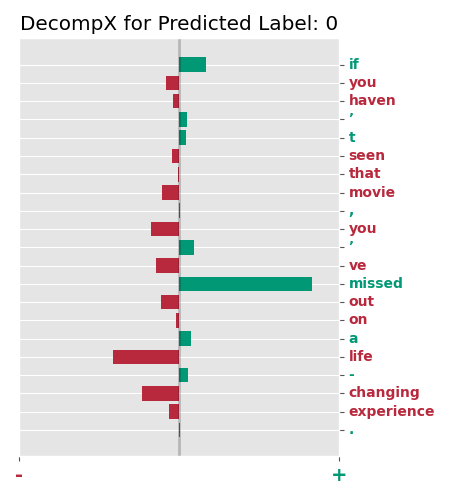

As we can see, model assigned highly negative values to [`missed`, `if` `not`] and wasn't able to understand sarcastic meanings.

**How to improve model?**
We need to improve model's ability on sarcastic texts. For this purpose, we may fine-tune model on sarcastic-focused datasets. Also sarcasm would understand in higher layers as it needs more interactions, we can use deeper model such as `large` variant or used variations that trained on more data or more duration such as `RoBERTa`.


## Fine-tuning BERT for question answering
In this section, we will use `BERT` for a question answering task, i.e., `SQuAD` [(Rajpurkar et al., 2016)](https://nlp.stanford.edu/pubs/rajpurkar2016squad.pdf) whose dataset was built from Wikipedia. Training on the full `SQuAD` dataset (108K examples) would takes a couple of hours, so we will provide you with a trained model to save your time. Run the following cell to download the model.

In [4]:
data_file = drive.CreateFile({'id': '19cnGSN88KlRJRcIqwxw3C4ylJftdkZ2W'})
data_file.GetContentFile('bert-base-cased-finetuned-squad.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-squad.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-squad.zip')
print("bert-base-cased-finetuned-squad downloaded!")

bert-base-cased-finetuned-squad downloaded!


### Question 2.5 (10 points)

Okay, same drill as before! Your task is to complete the code to show the model's predicted answer to each question. If you forgot how `BERT` solves extractive question answering tasks, check out Section 4.2 and Figure 1 / Figure 4c) in the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf). Your output should be three strings, each corresponding to the answer of one of the three given questions.

*Hints*

*   `model(**inputs)]` gives you the start and end logits of the model for  `inputs`.
*   Use `tokenizer.convert_tokens_to_string` to convert a sequence of tokens (string) into a single string.
*   Use `tokenizer.convert_ids_to_tokens` to convert a sequence of indices into a sequence of tokens.

In [5]:
import textwrap
task_name = "SQuAD"
model_name_or_path = "bert-base-cased-finetuned-squad"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "question_answering"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

context = """This course will broadly focus on deep learning methods for
natural language processing. Most of the semester will focus on very recent
transfer learning methods that have significantly pushed forward the state of
the art. It is intended for graduate students in computer science and
linguistics who are (1) interested in learning about cutting-edge research
progress in NLP and (2) familiar with machine learning fundamentals. We will
cover modeling architectures, training objectives, and downstream tasks (e.g.,
text classification, question answering, and text generation). Coursework
includes reading recent research papers, programming assignments, and a final
project. This class will be asynchronous: lectures will be prerecorded and
posted on a weekly basis, along with accompanying readings and assignments."""

questions = [
    "What is the focus of this course?",
    "Who is this course intended for?",
    "What is the coursework?",
]

for idx, question in enumerate(questions, start=1):
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    # YOUR CODE HERE!
    outputs = model(**inputs)
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    answer_start = torch.argmax(start_logits)
    answer_end = torch.argmax(end_logits) + 1
    answer_tokens = input_ids[answer_start:answer_end]
    answer_str = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(answer_tokens))

    print(f"({idx}) ***\n\
Question      : {textwrap.fill(question, width=100)}\n\
answer indexes: {answer_start} -> {answer_end}\n\
Answer Tokens : {answer_tokens}\n\
Answer        : {answer_str}\n\
")

Some weights of the model checkpoint at ./pretrained_models_dir/bert-base-cased-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(1) ***
Question      : What is the focus of this course?
answer indexes: 16 -> 23
Answer Tokens : [1996, 3776, 4069, 1111, 2379, 1846, 6165]
Answer        : deep learning methods for natural language processing

(2) ***
Question      : Who is this course intended for?
answer indexes: 50 -> 57
Answer Tokens : [4469, 1651, 1107, 2775, 2598, 1105, 23213]
Answer        : graduate students in computer science and linguistics

(3) ***
Question      : What is the coursework?
answer indexes: 118 -> 130
Answer Tokens : [3455, 2793, 1844, 4580, 117, 4159, 15799, 117, 1105, 170, 1509, 1933]
Answer        : reading recent research papers, programming assignments, and a final project



### Question 2.6 (5 points)
Come up with a new question about this passage that the model gets wrong. The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage). Show the model's predicted answer on this new sentence.

In [6]:
# If question is multi-part --it needs different part of reference passage to answer, which aren't contiguous-- it can't answer correctly as it is out of BERT's ability
# your_question = '' # change to your question
# your_answer = '' # change to your sentence's ground-truth answer
# your_model_prediction = 'blah blah' # obviously, change this to the model's predicted answer span

Your_qa_pairs = [
    ("What are the primary topics covered in this course?", "The primary topics covered in this course include deep learning methods for natural language processing and recent transfer learning methods."),
    ("Who is the target audience for this course, and what background is expected of them?", "The target audience for this course is graduate students in computer science and linguistics. They are expected to be familiar with machine learning fundamentals."),
    ("The University of Tehran is located in which country?", "Iran"),
]
your_question, your_answer = Your_qa_pairs[-1]

# YOUR CODE HERE
for idx, (your_question, your_answer) in enumerate(Your_qa_pairs, start=1):
    inputs = tokenizer.encode_plus(your_question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    outputs = model(**inputs)
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    answer_start = torch.argmax(start_logits)
    answer_end = torch.argmax(end_logits) + 1
    answer_tokens = input_ids[answer_start:answer_end]
    answer_str = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(answer_tokens))

    print(f"({idx}) ***\n\
Question      : {textwrap.fill(your_question, width=100)}\n\
answer indexes: {answer_start} -> {answer_end}\n\
Answer Tokens : {answer_tokens}\n\
Answer        : {answer_str}\n\
")
    your_model_prediction = answer_str



print('your question: "%s"\nground-truth answer: %s\npredicted answer: %s'\
      % (your_question, your_answer, your_model_prediction))

(1) ***
Question      : What are the primary topics covered in this course?
answer indexes: 92 -> 102
Answer Tokens : [13117, 4220, 1116, 117, 2013, 11350, 117, 1105, 14102, 8249]
Answer        : modeling architectures, training objectives, and downstream tasks

(2) ***
Question      : Who is the target audience for this course, and what background is expected of them?
answer indexes: 60 -> 67
Answer Tokens : [4469, 1651, 1107, 2775, 2598, 1105, 23213]
Answer        : graduate students in computer science and linguistics

(3) ***
Question      : The University of Tehran is located in which country?
answer indexes: 0 -> 1
Answer Tokens : [101]
Answer        : [CLS]

your question: "The University of Tehran is located in which country?"
ground-truth answer: Iran
predicted answer: [CLS]


### Question 2.7 (5 points)
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening.

***WRITE YOUR ANSWER HERE IN A FEW SENTENCES***

AS BERT is not a generative models, it can't answer some questions:
- Out of context: if answer hasn't provided in context, it isn't able to answer the question. >> You can't solve this with BERT effectively, how ever, you may used a large corpus and use BERT as retriever. The best option is to use a generative model that seen relevant data in its training data or can retrieve, using a retriever.
- Multi-part questions: If you ask a question which needs to refer to multiple non-continues part of the reference, it is unable to answer, as it just able to predict one span. >> We may design a head to make it possible for BERT to predict multiple spans, or use a generative model (both decoder-only as GPTs or encoder-decoder as T5 are suitable)

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * *your response here*
        * Yes and I used ms-copilot and openAI's chatGPT


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * *your response here*
        * **Part 2, Que 2.3, Copilot:** "I want a sarcastic positive movie review such as sentence below: 'You absolutely wasted your time if you haven\'t watched that movie!' Please create a better one"
        * **Part 2, Que 2.6, chatGPT:** "consider context below, I want you to design a question that is multi-part --it needs different part of reference passage to answer, which aren't contiguous-- it can't answer correctly as it is out of BERT's ability, As I want to give it to the best model to show its restrictions. please provide three different question-answer pair..." [Link to the Conversation](https://chat.openai.com/share/44ee8d6e-7c0b-4780-8428-d48d0a0a0020)
*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * *your response here*
        * I just used part of its answer and yes, they weren't completely correct and made me to clarify question and ask again.
